# Multi-Class Prediction of Obesity Risk

**Programa de Engenharia de Sistemas e Computação**

**CPS833 - Data Mining**

**Professor**: Geraldo Zimbrão da Silva

**Aluno**: Luiz Henrique Souza Caldas

## Importação de bibliotecas

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Pré-processamento

In [12]:
# Importação dos dados
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

# Verificação de dados ausentes (limpeza de dados)
print(f"{train_dataset.isnull().any().sum()} dados faltantes no dataset de treino")
print(f"{train_dataset.isnull().any().sum()} dados faltantes no dataset de teste")

# Verificação de linhas duplicadas (redução de dimensionalidade)
print(f"{train_dataset.duplicated().sum()} linhas duplicadas no dataset de treino")
print(f"{train_dataset.duplicated().sum()} linhas duplicadas no dataset de teste")

# TODO Verificação de ouliers (redução de dimensionalidade)

# Codificando features categóricas com Label Encoder (transformação de dados)
label_encoder = LabelEncoder()

train_dataset_encoded = train_dataset.copy()  # Faz uma cópia do dataset de treino para evitar alterações no original
for col in train_dataset.columns:
    if train_dataset[col].dtype == 'object':  # Verifica se a coluna é categórica
        train_dataset_encoded[col] = label_encoder.fit_transform(train_dataset[col])

test_dataset_encoded = test_dataset.copy() # Faz uma cópia do dataset de teste para evitar alterações no original
for col in test_dataset.columns:
    if test_dataset[col].dtype == 'object':  # Verifica se a coluna é categórica
        test_dataset_encoded[col] = label_encoder.fit_transform(test_dataset[col])

# Separação entre features e labels no dataset de treinamento e remoção da coluna id nos dois datasets
features = train_dataset_encoded.iloc[:,1:17].drop(['SMOKE', 'FAVC'], axis=1).values # features do dataset de treino removendo o id
labels = train_dataset_encoded.iloc[:,17].values # labels
test = test_dataset_encoded.drop(columns=['id']) # removendo o id do dataset de teste

# Escalonando os dados (transformação de dados)
scaler = StandardScaler()
features = scaler.fit_transform(features)
test = scaler.fit_transform(test)

0 dados faltantes no dataset de treino
0 dados faltantes no dataset de teste
0 linhas duplicadas no dataset de treino
0 linhas duplicadas no dataset de teste


## Avaliação do modelo usando o dataset de treinamento

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, stratify = labels)
    
naive_bayes = GaussianNB() # criação do modelo Naive Bayes
naive_bayes.fit(x_train,y_train) # treinamento do modelo Naive Bayes
y_predict_naive_bayes = naive_bayes.predict(x_test) # classificação com o modelo Naive Bayes
resultado_naive_bayes = accuracy_score(y_test, y_predict_naive_bayes) # percentual de acerto do modelo Naive Beyes

#  {'max_depth': 40, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 900}
random_forest = RandomForestClassifier(max_depth=40, max_features=5, min_samples_leaf=2, n_estimators=900, n_jobs=-1)
random_forest.fit(x_train,y_train) # treinamento do modelo de Random Forest
y_predict_forest = random_forest.predict(x_test) # classificação com o modelo Random Forest
resultado_forest = accuracy_score(y_test, y_predict_forest) # percentual de acerto do modelo Random Forest

Avaliação dos resultados:

A acurácia do Naïve Beyes foi de 0.6767822736030829
A acurácia do Random Forest foi de 0.8966763005780347


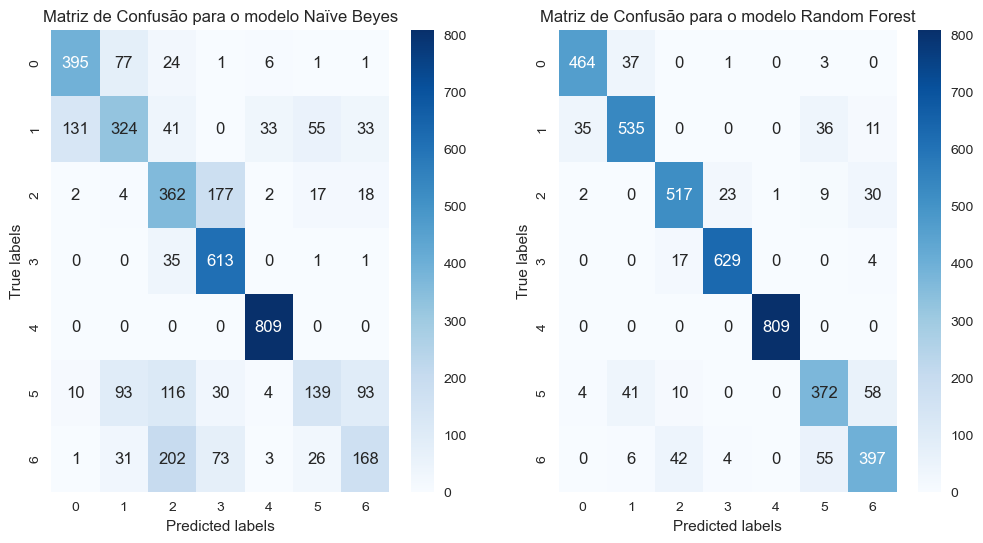

In [14]:
# Decodificando os labels
mapeamento = {
    0: "Insufficient_Weight",
    1: "Normal_Weight",
    2: "Obesity_Type_I",
    3: "Obesity_Type_II",
    4: "Obesity_Type_III",
    5: "Overweight_Level_I",
    6: "Overweight_Level_II"
}
y_predict_naive_bayes = [mapeamento[i] for i in y_predict_naive_bayes]
y_predict_forest = [mapeamento[i] for i in y_predict_forest]
y_test = [mapeamento[i] for i in y_test]

cm_nb = confusion_matrix(y_test, y_predict_naive_bayes)
cm_rf = confusion_matrix(y_test, y_predict_forest)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d', ax=axs[0])
axs[0].set_title('Matriz de Confusão para o modelo Naïve Beyes')
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', ax=axs[1])
axs[1].set_title('Matriz de Confusão para o modelo Random Forest')
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')

print(f"A acurácia do Naïve Beyes foi de {resultado_naive_bayes}")
print(f"A acurácia do Random Forest foi de {resultado_forest}")